
Problem 3

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Prepare the data

In [2]:
data = load_iris() #shift+tab

In [3]:
df = pd.DataFrame()
df['sepal length'] = data['data'][:,0]
df['petal length'] = data['data'][:,2]
df['petal width'] = data['data'][:,3]

In [4]:
display(df)

,sepal length,petal length,petal width
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
...,...,...,...
145,6.7,5.2,2.3
146,6.3,5.0,1.9
147,6.5,5.2,2.0
148,6.2,5.4,2.3


In [5]:
X = df.to_numpy() # These are our features

### y will not be used because we are doing unsupervised learning

#### data preparation is complete, on to my kmeans algorithm for k=3

predicted_labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
cluster centroids: [[5.9016129  4.39354839 1.43387097]
 [5.006      1.462      0.246     ]
 [6.85       5.74210526 2.07105263]]


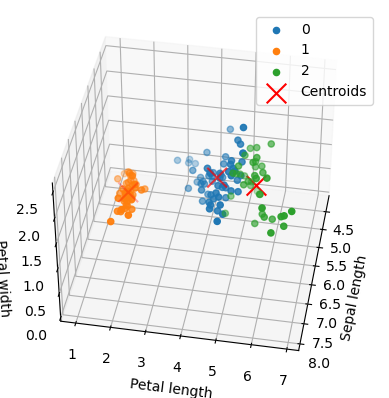

In [6]:

class KMeans:
    def __init__(self, k):
        self.k = k
        self.cluster_labels = None
    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False), :]
        self.cluster_labels = np.arange(self.k)        
        while True:
            distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
            self.clusters = np.argmin(distances, axis=0)
            new_centroids = np.array([X[self.clusters == i, :].mean(axis=0) for i in range(self.k)])
            # check convergence
            if np.array_equal(new_centroids, self.centroids):
                break
            else:
                self.centroids = new_centroids

    def predict(self, X):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        return self.cluster_labels[np.argmin(distances, axis=0)]
model = KMeans(k=3)
model.fit(X)
kmeans_labels = model.predict(X)
cluster_coords = model.centroids
print('predicted_labels:', kmeans_labels)
print('cluster centroids:', cluster_coords)

# Visualize the clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(model.k):
    cluster_points = X[kmeans_labels  == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'{i}')

ax.scatter(model.centroids[:, 0], model.centroids[:, 1], model.centroids[:, 2], marker='x', s=200, c='red', label='Centroids')
ax.view_init(elev=40, azim=10)  # Adjust the elevation (elev) and azimuth (azim) angles

ax.set_xlabel('Sepal length')
ax.set_ylabel('Petal length')
ax.set_zlabel('Petal width')

plt.legend()
plt.show()

#### now let's see how sklearn does for k =3 

C:\Users\melvi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


sk_predicted_labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
sk cluster centroids: [[5.9016129  4.39354839 1.43387097]
 [5.006      1.462      0.246     ]
 [6.85       5.74210526 2.07105263]]


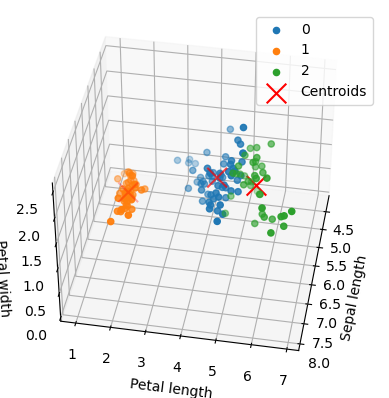

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

skmodel = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)

skmodel.fit(X)
skmodel_labels = skmodel.predict(X)

print('sk_predicted_labels:', skmodel_labels)
print('sk cluster centroids:', skmodel.cluster_centers_)
# Visualize the sklearn clusters in 3D
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

for i in range(skmodel.n_clusters):
    cluster_points = X[skmodel_labels == i]
    ax1.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'{i}')

ax1.scatter(skmodel.cluster_centers_[:, 0], skmodel.cluster_centers_[:, 1], skmodel.cluster_centers_[:, 2], marker='x', s=200, c='red', label='Centroids')
ax1.view_init(elev=40, azim=10)  # Adjust the elevation (elev) and azimuth (azim) angles

ax1.set_xlabel('Sepal length')
ax1.set_ylabel('Petal length')
ax1.set_zlabel('Petal width')

plt.legend()
plt.show()

### The results for my Kmeans algorithm and the SK Kmeans algorithm are virtually identical. 
### Comparing the predicted labels, I see a very close similarity in clustering 
### The respective cluster centroids also have approximately equal coordinates.

#### Now let us vary the number of clusters for both to k=5, starting with my algorithm...

predicted_labels: [1 3 3 3 3 1 3 3 3 3 1 3 3 3 1 1 1 1 1 1 1 1 3 1 3 1 1 1 1 3 3 1 1 1 3 3 1
 3 3 1 3 3 3 1 1 3 1 3 1 3 4 4 4 0 4 0 4 0 4 0 0 0 0 4 0 4 0 0 4 0 4 0 4 4
 4 4 4 4 4 0 0 0 0 4 0 4 4 4 0 0 0 4 0 0 0 0 0 4 0 0 2 4 2 2 2 2 0 2 2 2 4
 4 2 4 4 2 2 2 2 4 2 4 2 4 2 2 4 4 2 2 2 2 2 4 4 2 2 2 4 2 2 2 4 2 2 2 4 4
 2 4]
cluster centroids: [[5.53214286 3.96071429 1.22857143]
 [5.276      1.52       0.292     ]
 [6.9125     5.846875   2.13125   ]
 [4.736      1.404      0.2       ]
 [6.2525     4.815      1.625     ]]


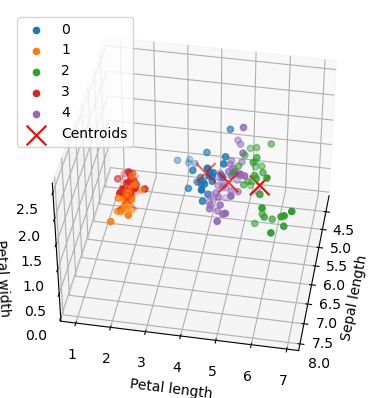

In [8]:
class KMeans:
    def __init__(self, k):
        self.k = k
        self.cluster_labels = None
    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False), :]
        self.cluster_labels = np.arange(self.k)        
        while True:
            distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
            self.clusters = np.argmin(distances, axis=0)
            new_centroids = np.array([X[self.clusters == i, :].mean(axis=0) for i in range(self.k)])
            # check convergence
            if np.array_equal(new_centroids, self.centroids):
                break
            else:
                self.centroids = new_centroids

    def predict(self, X):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        return self.cluster_labels[np.argmin(distances, axis=0)]
model = KMeans(k=5)
model.fit(X)
kmeans_labels = model.predict(X)
cluster_coords = model.centroids
print('predicted_labels:', kmeans_labels)
print('cluster centroids:', cluster_coords)

# Visualize the clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(model.k):
    cluster_points = X[kmeans_labels  == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'{i}')

ax.scatter(model.centroids[:, 0], model.centroids[:, 1], model.centroids[:, 2], marker='x', s=200, c='red', label='Centroids')
ax.view_init(elev=40, azim=10)  # Adjust the elevation (elev) and azimuth (azim) angles

ax.set_xlabel('Sepal length')
ax.set_ylabel('Petal length')
ax.set_zlabel('Petal width')

plt.legend()
plt.show()

#### and now for the SK model at k=5


C:\Users\melvi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


sk_predicted_labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 4 0 4 0 4 0 4 4 4 4 0 4 0 4 4 0 4 0 4 0 0
 0 0 0 0 0 4 4 4 4 0 4 0 0 0 4 4 4 0 4 4 4 4 4 0 4 4 3 0 2 3 3 2 4 2 3 2 3
 3 3 0 3 3 3 2 2 0 3 0 2 0 3 2 0 0 3 2 2 2 3 0 3 2 3 3 0 3 3 3 0 3 3 3 0 3
 3 0]
sk cluster centroids: [[6.25142857 4.75142857 1.58      ]
 [5.006      1.462      0.246     ]
 [7.475      6.3        2.05      ]
 [6.512      5.512      2.132     ]
 [5.53214286 3.96071429 1.22857143]]


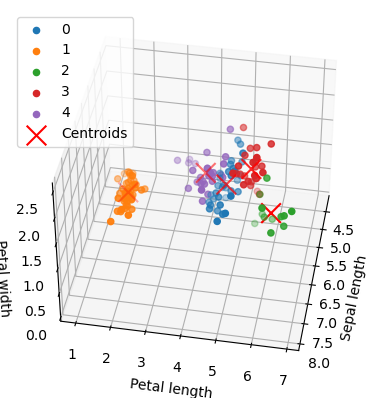

In [9]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

skmodel = KMeans(
    n_clusters=5,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)

skmodel.fit(X)
skmodel_labels = skmodel.predict(X)

print('sk_predicted_labels:', skmodel_labels)
print('sk cluster centroids:', skmodel.cluster_centers_)
# Visualize the sklearn clusters in 3D
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

for i in range(skmodel.n_clusters):
    cluster_points = X[skmodel_labels == i]
    ax1.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'{i}')

ax1.scatter(skmodel.cluster_centers_[:, 0], skmodel.cluster_centers_[:, 1], skmodel.cluster_centers_[:, 2], marker='x', s=200, c='red', label='Centroids')
ax1.view_init(elev=40, azim=10)  # Adjust the elevation (elev) and azimuth (azim) angles

ax1.set_xlabel('Sepal length')
ax1.set_ylabel('Petal length')
ax1.set_zlabel('Petal width')

plt.legend()
plt.show()

### This time, I observe that the 5 sets are clustered differently between my algorithm and that of SKlearn.
### The centroids are also located differently